In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# cteate two circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)


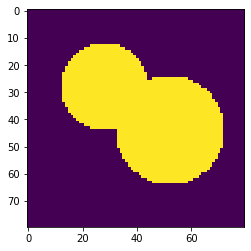

In [3]:
plt.imshow(image)

# segmetation demo

## read image and binarized the image

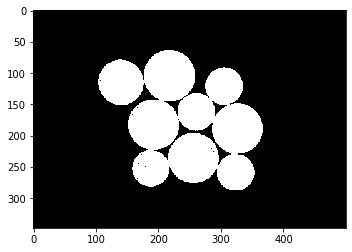

In [5]:
im = cv2.imread('coin.jpg')
# plt.imshow(im,cmap ='gray')
# smoothing the image to remove noise
im = cv2.pyrMeanShiftFiltering(im, 21, 51)
# change color image to the gray
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
# get the binary image
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(thresh, cmap='gray')

## morphology to obtain the object and background

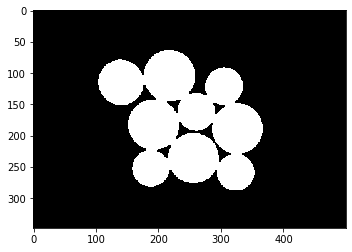

In [6]:
kernel = np.ones((3,3),np.uint8)
# to fill the holes in the objects
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE, kernel, iterations = 1)
plt.imshow(closing, cmap='gray')

## find the backround using dilate

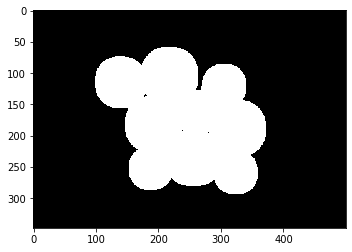

In [7]:
# do another morphlogy to get the real background
sure_bg = cv2.dilate(closing, kernel,iterations=5)
plt.imshow(sure_bg, cmap='gray')

## find the object using the distance transform

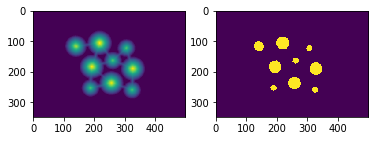

In [8]:
# find the real objects in the regions
dist_transform = cv2.distanceTransform(closing,cv2.DIST_L2,5)
# can get the real objects
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

plt.subplot(121)
plt.imshow(dist_transform)
plt.subplot(122)
plt.imshow(sure_fg)

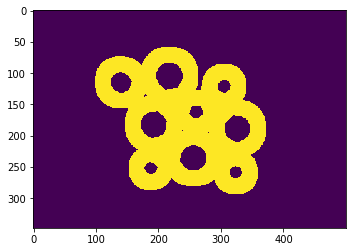

In [55]:
plt.imshow(unknown)

## label the object

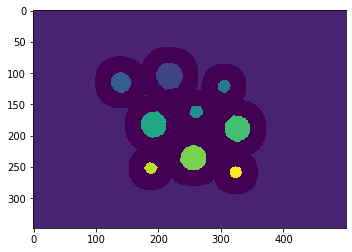

In [10]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# mark the region of unknown with zero
markers[unknown==255] = 0
plt.imshow(markers)

## watershed find the object

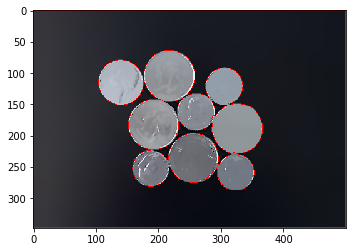

In [11]:
# do the segmentation using the markers 
markers = cv2.watershed(np.uint8(im),markers)
im[markers == -1] = [255,0,0]
plt.imshow(im)